### Submitted by: Naailah Mahamoodally (40269839)
Explainable Occupancy Estimation Using PCA and SMOTE

## Install Libraries

In [3]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4

In [4]:
!pip install PCA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.9 MB/s eta 0:00:00


In [5]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 8.9 MB/s eta 0:00:00


## Import Libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.decomposition import PCA
np.random.seed(8)
from sklearn import feature_selection

In [7]:
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.0.3
Numpy version:  1.25.2
Seaborn version:  0.13.1


## Import Dataset

In [8]:
df= pd.read_csv("Occupancy_Estimation.csv")

In [9]:
y = df['Presence']
X = df.drop(['Time', 'Presence'], axis= 1)

## Data Exploration

In [10]:
df.shape

(1068, 13)

In [11]:
len(df.index)

1068

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           1068 non-null   int64  
 1   co2            1068 non-null   int64  
 2   Temperature_1  1068 non-null   float64
 3   Temperature_2  1068 non-null   float64
 4   Temperature_3  1068 non-null   float64
 5   Door_Contact   1068 non-null   int64  
 6   Motion         1068 non-null   int64  
 7   Humidity_1     1068 non-null   int64  
 8   Humidity_2     1068 non-null   float64
 9   Humidity_3     1068 non-null   float64
 10  COV            1068 non-null   int64  
 11  Mean_Power     1068 non-null   float64
 12  Presence       1068 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 108.6 KB


In [13]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [14]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


Class 0: 772 instances
Class 1: 192 instances
Class 2: 104 instances


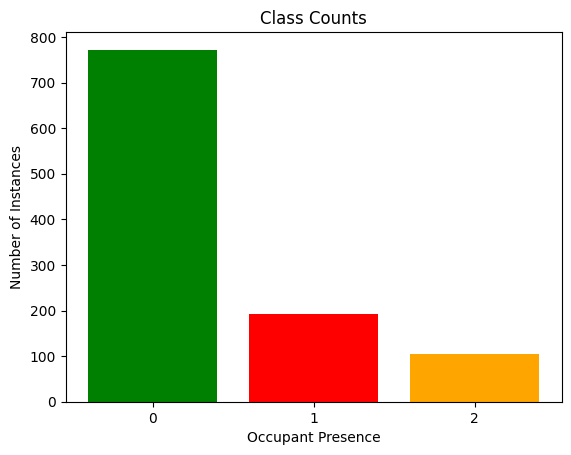

In [15]:
unique_classes, class_counts = np.unique(y, return_counts=True)
colors = ['green', 'red', 'orange']
# Print the results
for class_label, count in zip(unique_classes, class_counts):
    print(f"Class {class_label}: {count} instances")
plt.bar(unique_classes, class_counts, color=colors)
plt.xlabel('Occupant Presence')
plt.ylabel('Number of Instances')
plt.title('Class Counts')
plt.xticks(unique_classes.astype(int))
plt.show()

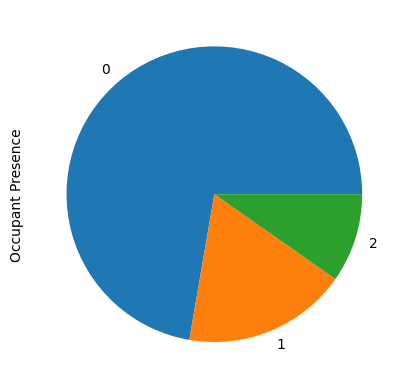

In [16]:
y.value_counts().plot(kind='pie')
plt.ylabel('Occupant Presence')
plt.show()

In [17]:
#Create new dataframe without the Time Feature
df1= pd.concat([X, y], axis=1)

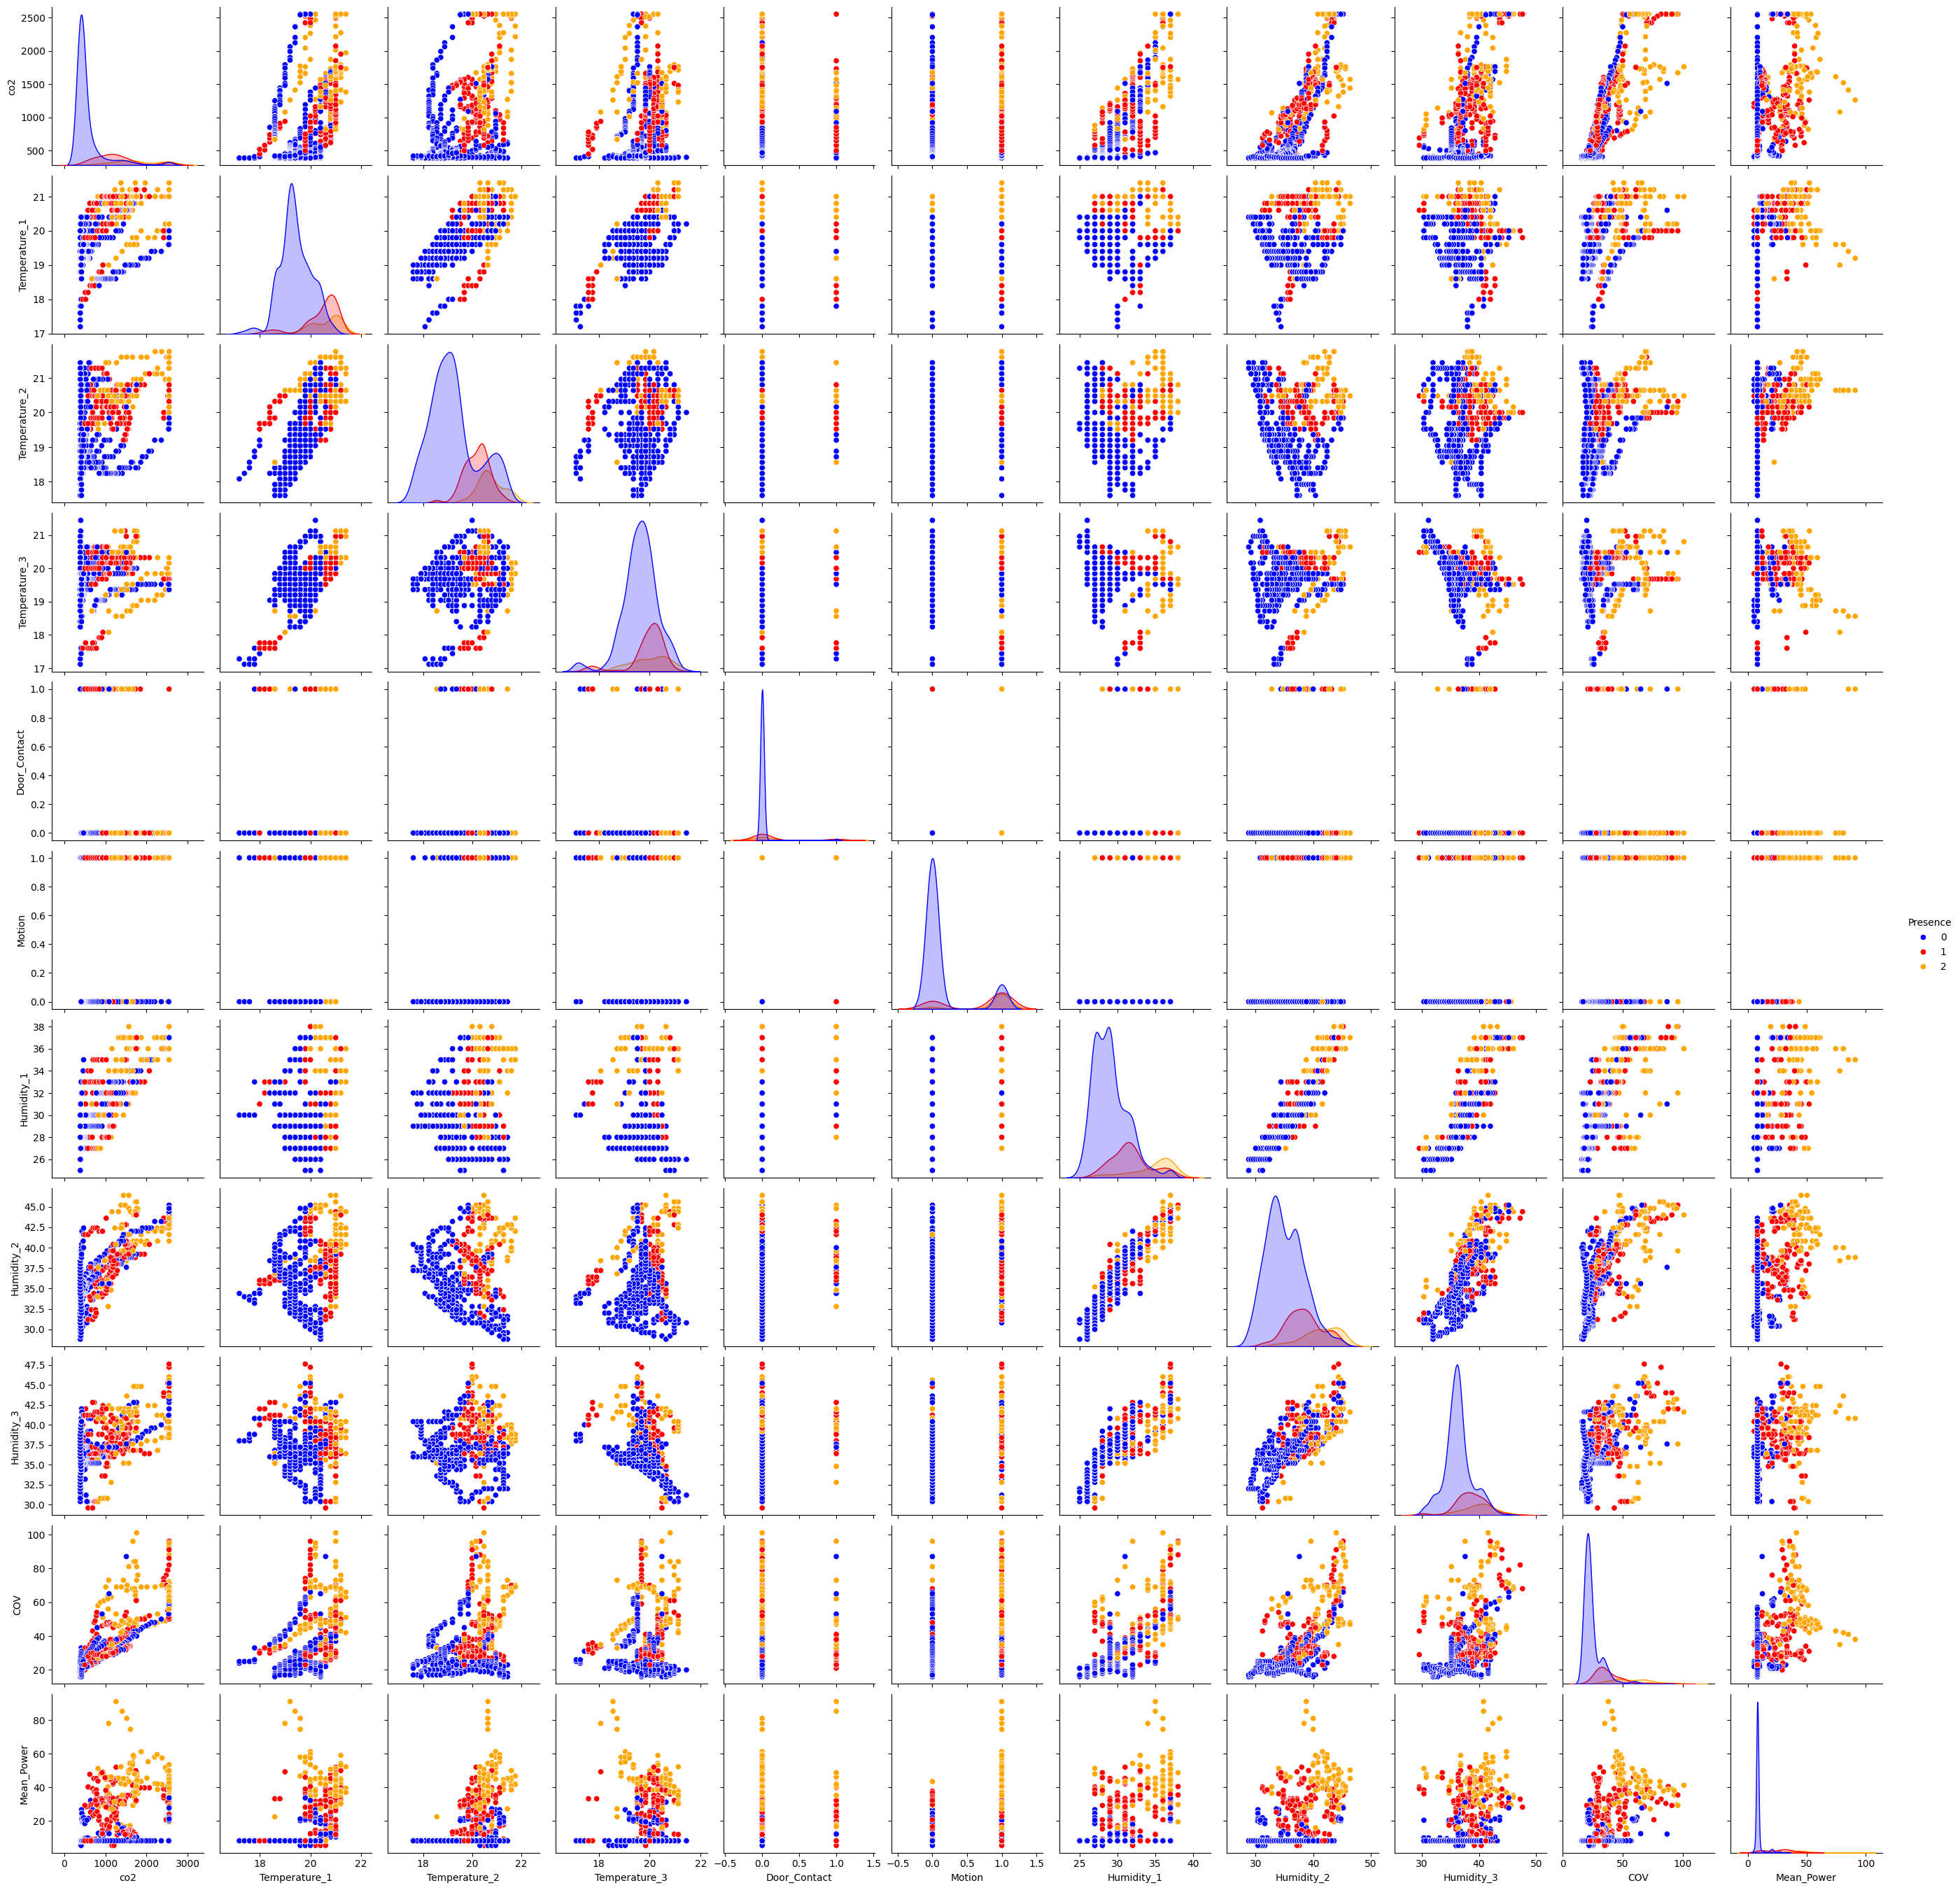

In [19]:
#Pairplot Diagram
custom_palette = {0: 'blue', 1: 'red', 2:'orange'}
sns.pairplot(df1, hue='Presence', palette=custom_palette)
plt.show()

In [20]:
X.describe().transpose()

count        mean         std     min     25%     50%  \
co2            1068.0  815.065543  608.208683  390.00  390.00  470.00   
Temperature_1  1068.0   19.710300    0.798925   17.20   19.20   19.60   
Temperature_2  1068.0   19.550861    1.011054   17.60   18.72   19.36   
Temperature_3  1068.0   19.711910    0.704365   17.12   19.36   19.84   
Door_Contact   1068.0    0.050562    0.219204    0.00    0.00    0.00   
Motion         1068.0    0.308052    0.461905    0.00    0.00    0.00   
Humidity_1     1068.0   30.056180    2.984281   25.00   28.00   29.00   
Humidity_2     1068.0   36.283146    3.841369   28.80   33.20   36.00   
Humidity_3     1068.0   37.092135    2.834897   29.60   35.20   36.40   
COV            1068.0   30.357678   14.895744   16.00   21.00   24.00   
Mean_Power     1068.0   15.372893   13.095271    5.50    8.25    8.25   

                   75%      max  
co2            1100.00  2550.00  
Temperature_1    20.40    21.40  
Temperature_2    20.48    21.76  
Temperature_3    20.16    21.44  
Door_Contact      0.00     1.00  
Motion            1.00     1.00  
Humidity_1       32.00    38.00  
Humidity_2       38.80    46.40  
Humidity_3       38.80    47.60  
COV              35.00   101.00  
Mean_Power       18.75    91.00

In [21]:
#observations and variables
observations = list(df.index)
variables = list(df1.columns)

### Standardization

In [22]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

In [23]:
Xcols = X.columns
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = Xcols
data_scaled.head(10)

co2  Temperature_1  Temperature_2  Temperature_3  Door_Contact  \
0 -0.699209      -3.143567      -1.455461      -3.454247     -0.230769   
1 -0.699209      -3.143567      -1.455461      -3.454247     -0.230769   
2 -0.699209      -2.893114      -1.297137      -3.681509     -0.230769   
3 -0.699209      -2.893114      -1.297137      -3.681509     -0.230769   
4 -0.699209      -2.642660      -1.138812      -3.681509     -0.230769   
5 -0.699209      -2.642660      -1.138812      -3.681509     -0.230769   
6 -0.699209      -2.642660      -1.138812      -3.454247     -0.230769   
7 -0.699209      -2.642660      -0.980487      -3.681509     -0.230769   
8 -0.699209      -2.642660      -0.980487      -3.681509     -0.230769   
9 -0.699209      -2.392207      -0.822162      -3.681509     -0.230769   

     Motion  Humidity_1  Humidity_2  Humidity_3       COV  Mean_Power  
0  1.498733   -0.018834   -0.490458    0.320396 -0.427012   -0.544184  
1 -0.667230   -0.018834   -0.490458    0.320396 -0.359847   -0.544184  
2 -0.667230   -0.018834   -0.594636    0.320396 -0.359847   -0.544184  
3 -0.667230   -0.018834   -0.594636    0.320396 -0.359847   -0.544184  
4 -0.667230   -0.018834   -0.594636    0.320396 -0.359847   -0.544184  
5  1.498733   -0.018834   -0.594636    0.320396 -0.359847   -0.544184  
6  1.498733   -0.018834   -0.594636    0.461561 -0.359847   -0.544184  
7  1.498733   -0.018834   -0.698814    0.602726 -0.359847   -0.544184  
8  1.498733   -0.018834   -0.698814    0.602726 -0.359847   -0.544184  
9  1.498733   -0.018834   -0.698814    0.602726 -0.359847   -0.544184

In [24]:
data_scaled.describe().transpose()

count          mean       std       min       25%       50%  \
co2            1068.0 -5.322417e-17  1.000468 -0.699209 -0.699209 -0.567613   
Temperature_1  1068.0  1.596725e-15  1.000468 -3.143567 -0.639032 -0.138125   
Temperature_2  1068.0  1.244115e-15  1.000468 -1.930436 -0.822162 -0.188863   
Temperature_3  1068.0 -2.661209e-16  1.000468 -3.681509 -0.499848  0.181937   
Door_Contact   1068.0 -1.995907e-17  1.000468 -0.230769 -0.230769 -0.230769   
Motion         1068.0 -7.983626e-17  1.000468 -0.667230 -0.667230 -0.667230   
Humidity_1     1068.0 -1.862846e-16  1.000468 -1.695065 -0.689326 -0.354080   
Humidity_2     1068.0  3.991813e-16  1.000468 -1.948954 -0.802992 -0.073744   
Humidity_3     1068.0  1.836234e-15  1.000468 -2.644063 -0.667757 -0.244263   
COV            1068.0 -1.330604e-16  1.000468 -0.964329 -0.628506 -0.427012   
Mean_Power     1068.0  2.661209e-17  1.000468 -0.754281 -0.544184 -0.544184   

                    75%       max  
co2            0.468701  2.853868  
Temperature_1  0.863690  2.115957  
Temperature_2  0.919410  2.186009  
Temperature_3  0.636460  2.454552  
Door_Contact  -0.230769  4.333333  
Motion         1.498733  1.498733  
Humidity_1     0.651658  2.663135  
Humidity_2     0.655504  2.634892  
Humidity_3     0.602726  3.708350  
COV            0.311800  4.744672  
Mean_Power     0.258008  5.777852

<ipython-input-25-7ab316c3acd2>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


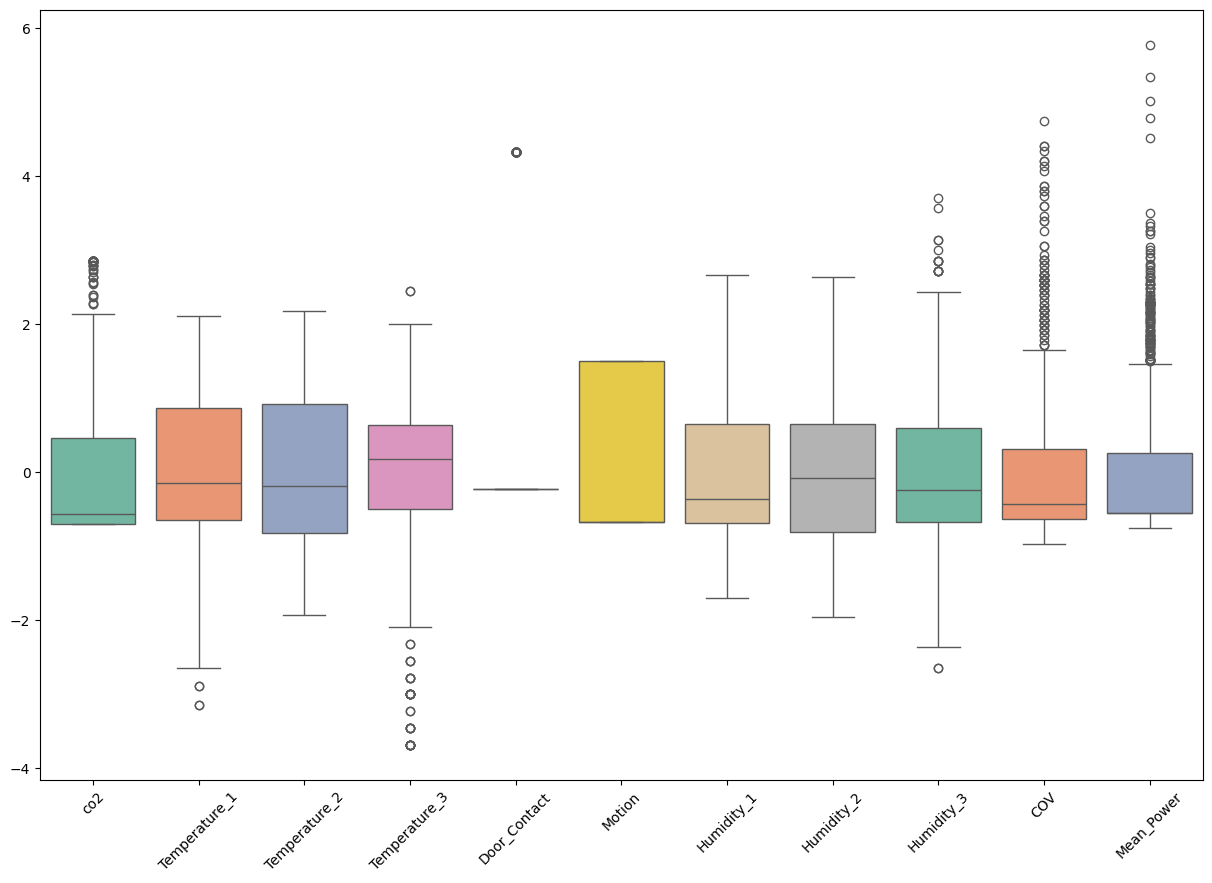

In [25]:
#visualisation of the data using a box plot
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=data_scaled, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

<ipython-input-26-b1750e851379>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


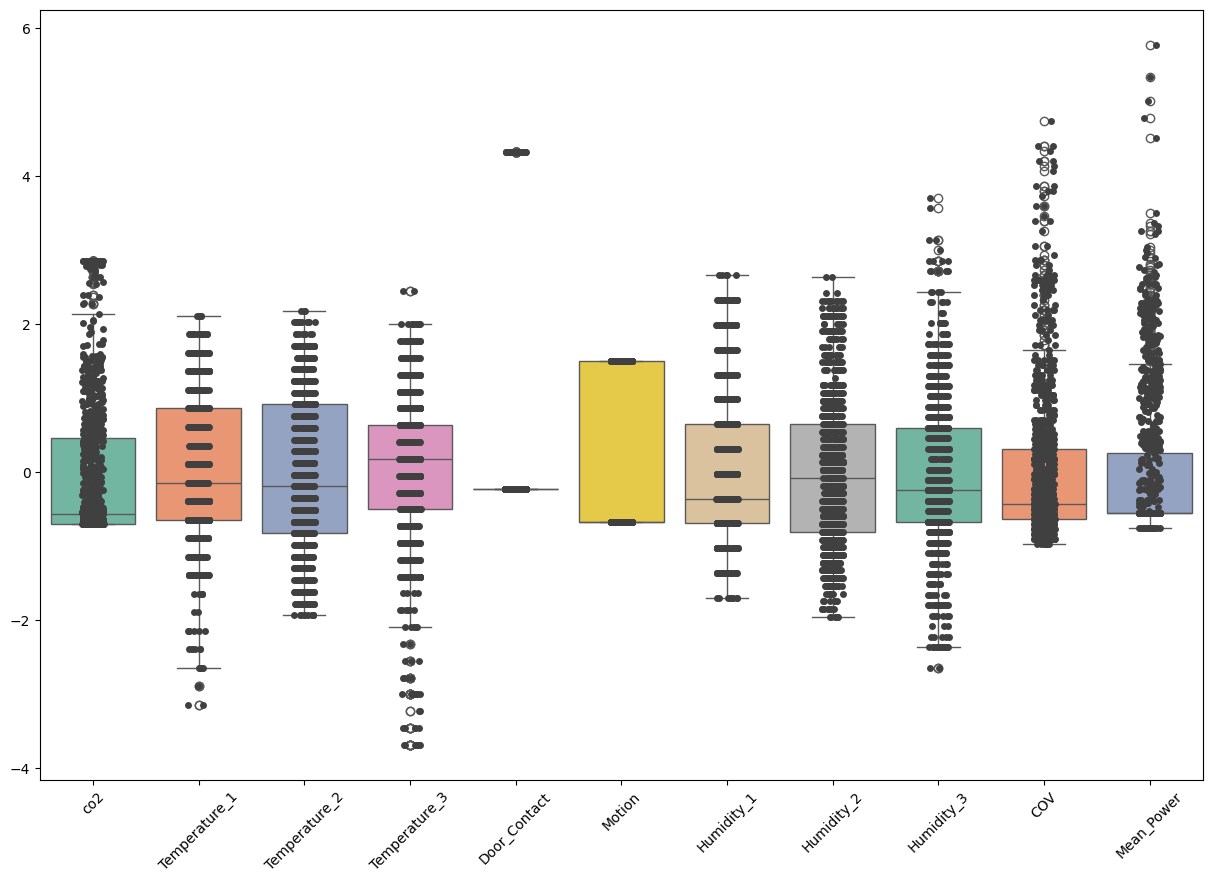

In [26]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=data_scaled, orient="v", palette="Set2")
ax = sns.stripplot(data=data_scaled, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Text(0.5, 1.0, 'Pairplot')

<Figure size 640x480 with 0 Axes>

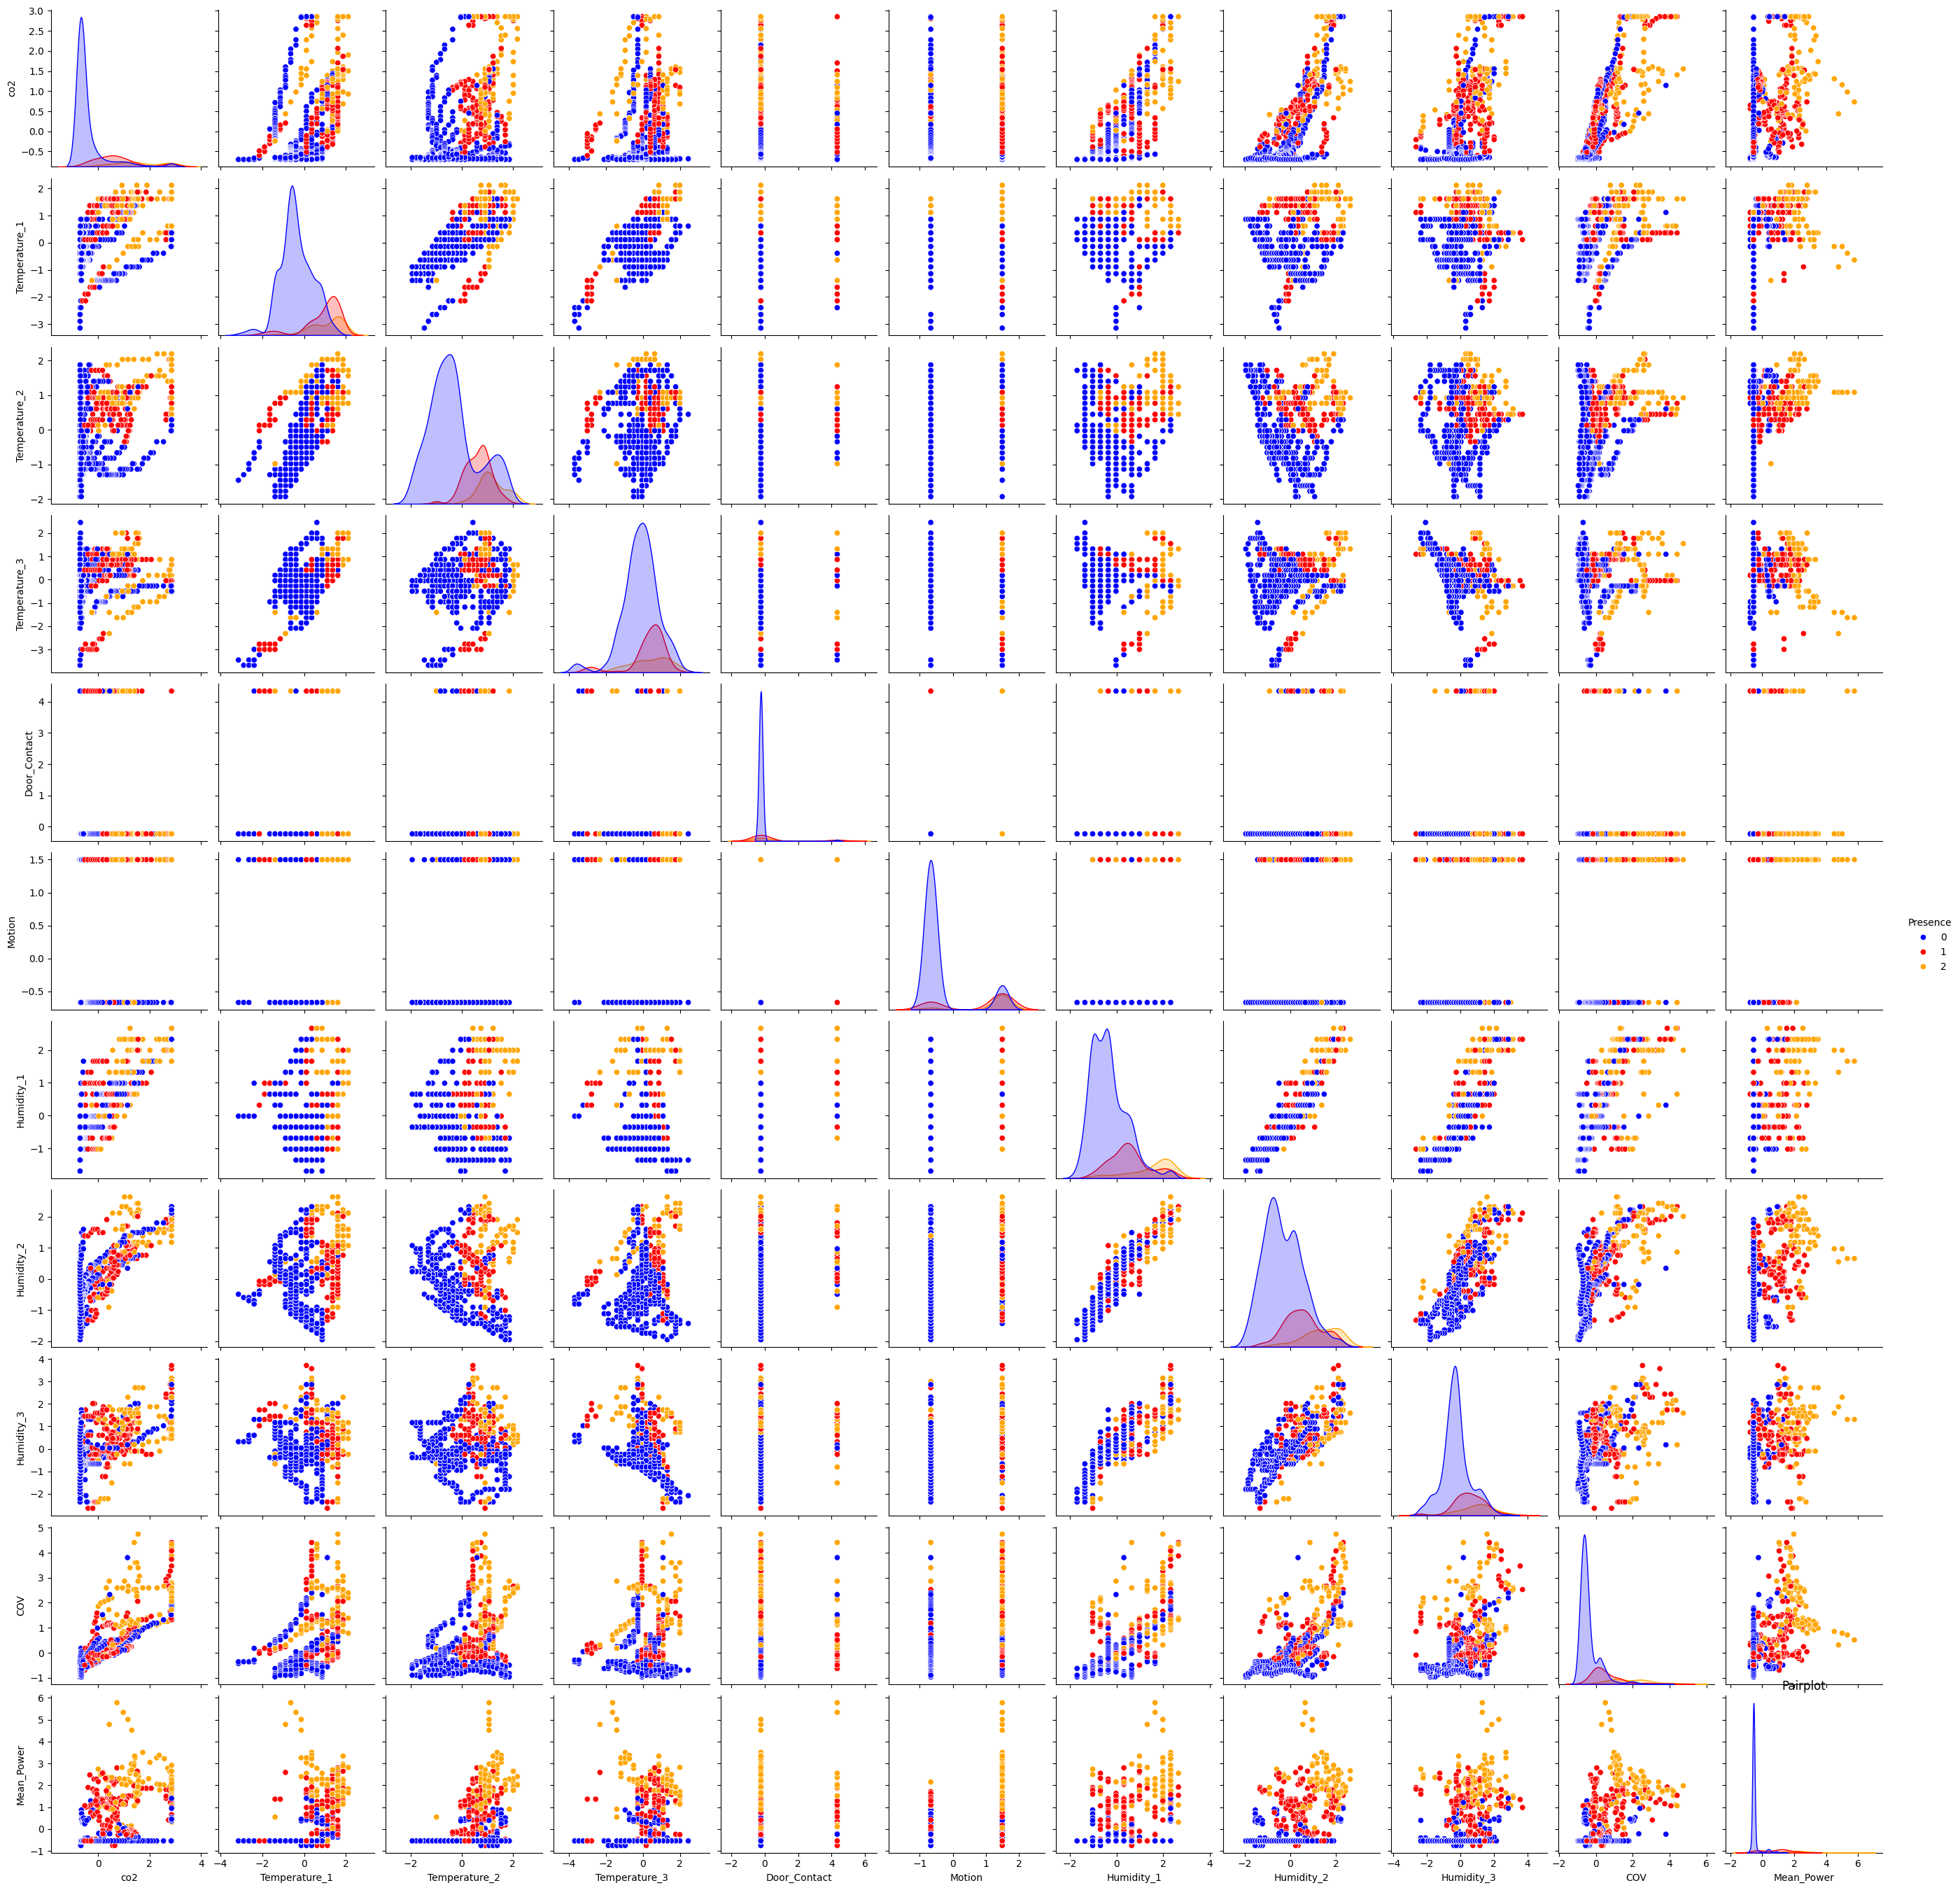

In [27]:
#pairplot
data_scaled =pd.DataFrame(data_scaled)
data_scaled2 = pd.concat([data_scaled, y], axis=1)
plt.figure()
sns.pairplot(data_scaled2, hue='Presence', palette=custom_palette)
plt.title('Pairplot')

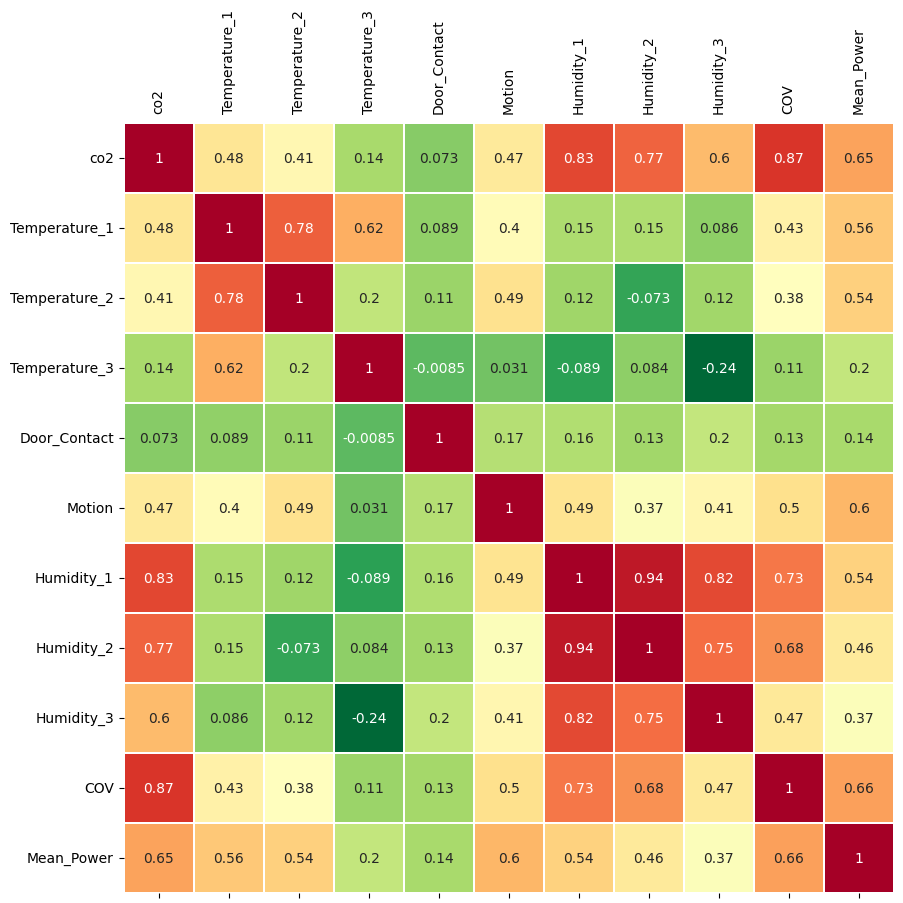

In [28]:
#Correlation Matrix
fig1,ax1 = plt.subplots(figsize=(10,10))
ax = sns.heatmap(data_scaled.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Text(0.5, 1.0, 'Covariance matrix')

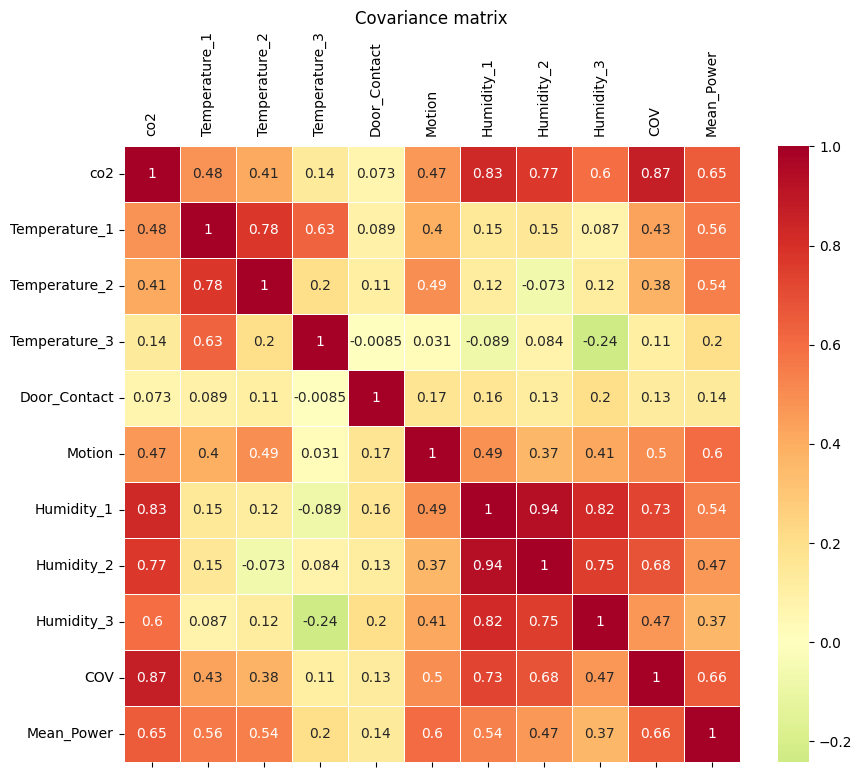

In [29]:
#Covariance Matrix
plt. figure(figsize=(10, 8))
ax = sns.heatmap(data_scaled.cov(), center=0,cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=True, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Covariance matrix')

### Feature importance

In [30]:
#ANOVA using f_classif
chi2, pval = feature_selection.f_classif(X,y)
np.round(chi2)

array([ 476.,  300.,  200.,   24.,   55.,  299.,  299.,  230.,  124.,
        578., 1215.])

In [31]:
#Mutual Information for classification using mutual_info_classification
from sklearn.preprocessing import LabelEncoder
for col in X:
    le = LabelEncoder()
    X[col]  = le.fit_transform(X[col])
feature_selection.mutual_info_classif(X, y)

array([0.33703827, 0.30339416, 0.2743444 , 0.11431132, 0.03986358,
       0.17699896, 0.19939218, 0.17658039, 0.17190265, 0.34082838,
       0.45219629])

In [32]:
#SelectKBest
selector = feature_selection.SelectKBest(k=7, score_func=feature_selection.mutual_info_classif)
data = selector.fit_transform(X,y)
selector.scores_

array([0.34373035, 0.30169033, 0.26647497, 0.11438554, 0.0393371 ,
       0.1802765 , 0.21051933, 0.18389279, 0.13965257, 0.34625924,
       0.4581424 ])

### PCA

In [122]:
pca = PCA()
Z = pca.fit_transform(data_scaled)
#pcs = pd.DataFrame(pcs)
#pcs.columns = ['pc_' + str(i) for i in range(1, 1)]

Text(0, 0.5, '$Z_2$')

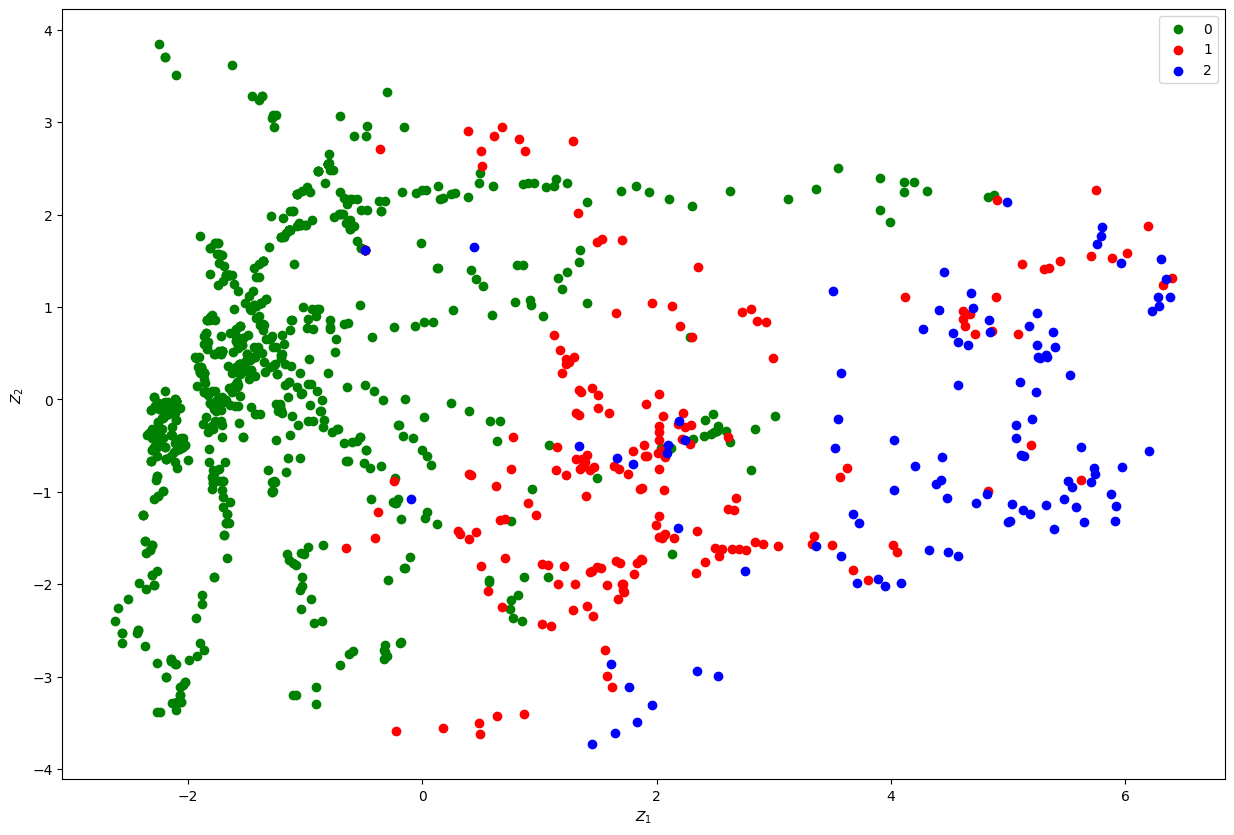

In [34]:
idx_zero= np.where(y == 0)
idx_one = np.where(y == 1)
idx_two = np.where(y == 2)

plt. figure(figsize=(15,10))
plt.scatter(Z[idx_zero,0], Z[idx_zero,1], c='g', label='0')
plt.scatter(Z[idx_one,0], Z[idx_one,1], c='r', label='1')
plt.scatter(Z[idx_two,0], Z[idx_two,1], c='b', label='2')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

In [123]:
eigenvectors = pca.components_
eigenvectors

array([[ 0.40199884,  0.24599605,  0.21907548,  0.07025762,  0.09290087,
         0.29841995,  0.38027143,  0.34979822,  0.30873113,  0.38062449,
         0.34657261],
       [ 0.03719998, -0.51028012, -0.45552633, -0.43222953,  0.02103459,
        -0.10176583,  0.30330296,  0.30844932,  0.33691651,  0.01109076,
        -0.17982109],
       [-0.1811961 , -0.07947061,  0.32583071, -0.51476411,  0.58279276,
         0.35606951, -0.07827305, -0.28588395,  0.1299638 , -0.10940608,
         0.08096406],
       [-0.05431225,  0.07712125, -0.26118786,  0.4593584 ,  0.7836976 ,
        -0.21870291,  0.02324398,  0.19003044, -0.00647202, -0.04221082,
        -0.10669989],
       [ 0.31744685,  0.11772032,  0.32422576, -0.31108744,  0.12148693,
        -0.73603235, -0.01439317, -0.1298014 , -0.00928983,  0.29154613,
        -0.15756895],
       [ 0.08571971, -0.30462854, -0.26040214, -0.11434346,  0.12572417,
         0.06009464, -0.07249004, -0.06065394, -0.63448854,  0.46798061,
         0.411

In [124]:
eigenvalues = pca.explained_variance_
eigenvalues

array([5.19790075, 2.21585836, 1.09465804, 0.92382545, 0.51516955,
       0.47113631, 0.30869933, 0.11549017, 0.0898426 , 0.06612914,
       0.01159958])

<Figure size 800x550 with 0 Axes>

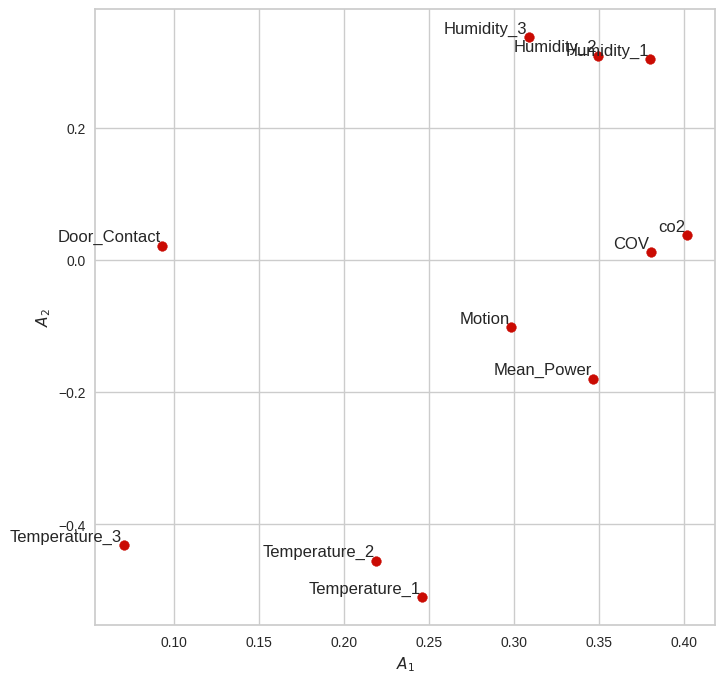

In [126]:
#Eigenvectors
A = pca.components_.T
plt. figure()
plt.figure(figsize=(8,8))
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-1, 1),
        textcoords='offset points', ha='right', va='bottom')



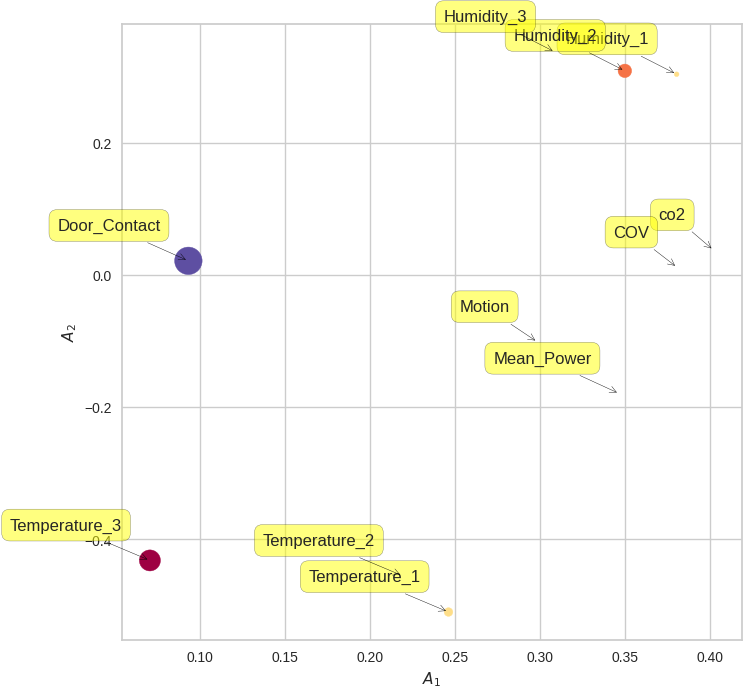

In [127]:
plt. figure(figsize=(8,8))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

## Percentage variance explained by principal components

In [160]:
pca = PCA(n_components=11)  # Specify the number of components you want
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the percentage variance explained by the fisrt 3 principal components
percentage_variance_explained = explained_variance_ratio[:3] * 100

print("Percentage variance explained by first 3 principal components:", percentage_variance_explained)

Percentage variance explained by first 3 principal components: [81.2299128  14.58559461  1.74304499]


### Pareto for explained variance

In [ ]:
#Explained variance
ell = pca.explained_variance_ratio_
plt. figure()
plt.figure(figsize=(10, 10))
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### Scree plot

In [ ]:
Lambda = pca.explained_variance_
plt. figure()
plt.figure(figsize=(10, 10))
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/Lambda.sum(), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

(Lambda[1]+Lambda[0])/Lambda.sum()

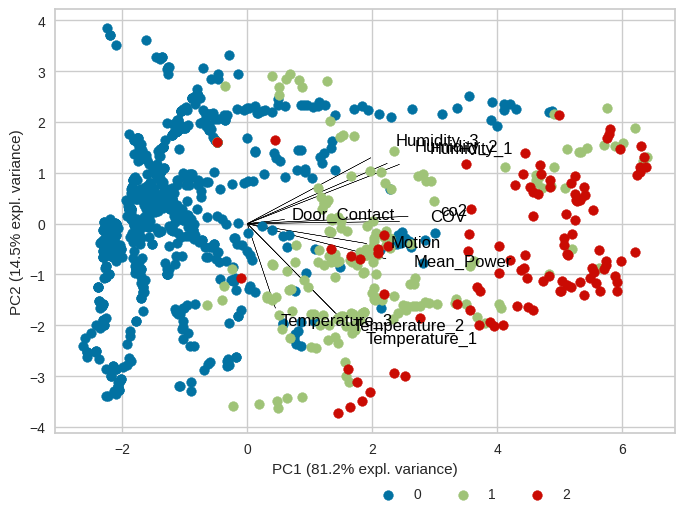

In [128]:
#Biplot for first 2 PC
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]


fig, ax = plt.subplots()

for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    ax.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='black', width=0.00005, head_width=0.0025)
    ax.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2, variables[i], color='black')

for i in df1['Presence'].unique():

  ax.scatter(Z1[df1['Presence']==i], Z2[df1['Presence']==i], marker='o',label=str(i))

legend = ax.legend(shadow=False, ncol=3, bbox_to_anchor=(0.85, -0.1))
ax.set_xlabel('PC1 (81.2% expl. variance)')  # Add label for the x-axis
ax.set_ylabel('PC2 (14.5% expl. variance)')  # Add label for the y-axis
plt.show()



Text(0.5, 1.0, '\n\nPrincipal components')

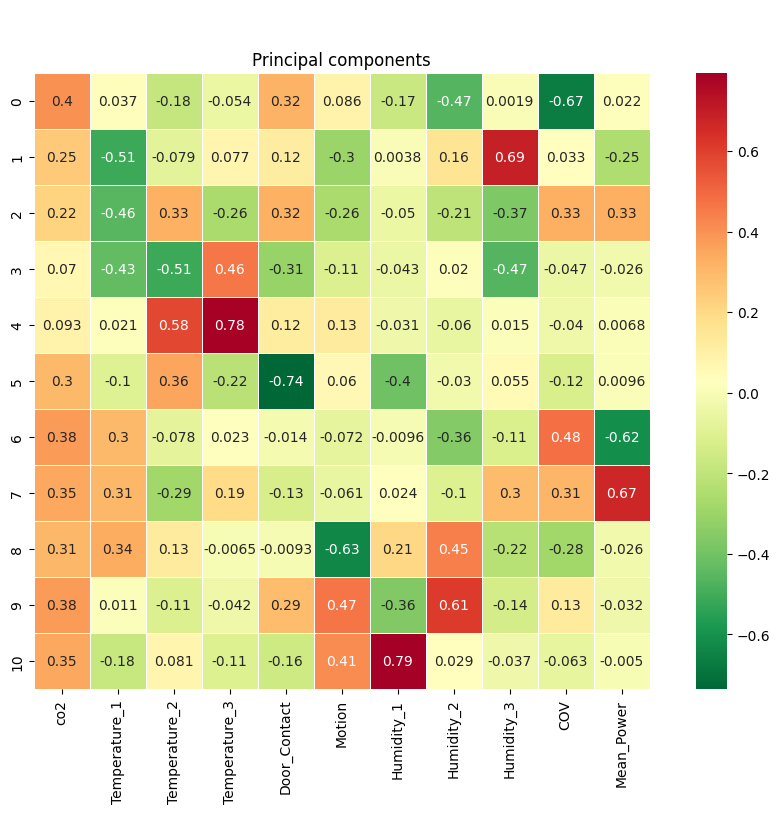

In [42]:
#heatmap
comps = pd.DataFrame(A,columns = ['co2', 'Temperature_1', 'Temperature_2', 'Temperature_3',
       'Door_Contact', 'Motion', 'Humidity_1', 'Humidity_2', 'Humidity_3',
       'COV', 'Mean_Power'])
plt.figure(figsize=(12, 8))
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('\n\nPrincipal components')

In [180]:

#Find out the number of components that covers 95% of explained variance
#In this case it is 2
from pca import pca
# Initialize and keep all PCs
model = pca(n_components=0.97)
# Fit transform
out = model.fit_transform(X)
out['PC']

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [97.0%] explained variance using the [11] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [97.00%] explained variance.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


PC1        PC2        PC3
0     -42.330385   3.063769 -12.414966
1     -42.113421   2.955436 -12.421389
2     -42.151116   3.169113 -11.236712
3     -42.151116   3.169113 -11.236712
4     -42.052801   3.260805 -10.507159
...          ...        ...        ...
1063   42.840181 -48.284293   3.147983
1064   86.109069  14.752672  -4.709820
1065   67.380195  11.948546  -5.157030
1066   74.892914   1.659115  -2.818762
1067  115.239586  57.037090  -9.814620

[1068 rows x 3 columns]

In [177]:
print(model.results['explained_var'][:3])

[0.81229913 0.95815507 0.97558552]


In [176]:
print(model.results['variance_ratio'])

[8.12299128e-01 1.45855946e-01 1.74304499e-02 1.13811589e-02
 7.19558754e-03 4.51534856e-03 8.16861738e-04 4.17628331e-04
 5.09537810e-05 2.58769168e-05 1.10601431e-05]


In [ ]:
model.scatter(label=True)

In [172]:
#EigenVectors
A = out['loadings'].T
A

PC1       PC2       PC3
co2            0.736546 -0.593946  0.178851
Temperature_1  0.041552  0.027507  0.257891
Temperature_2  0.056763  0.064185  0.471662
Temperature_3  0.015456  0.021334  0.174608
Door_Contact   0.000484  0.000304 -0.002402
Motion         0.004782  0.003819 -0.002031
Humidity_1     0.040556 -0.040406 -0.165650
Humidity_2     0.120555 -0.143318 -0.629733
Humidity_3     0.067287 -0.081129 -0.465011
COV            0.221746 -0.104514 -0.008455
Mean_Power     0.618394  0.776018 -0.090734

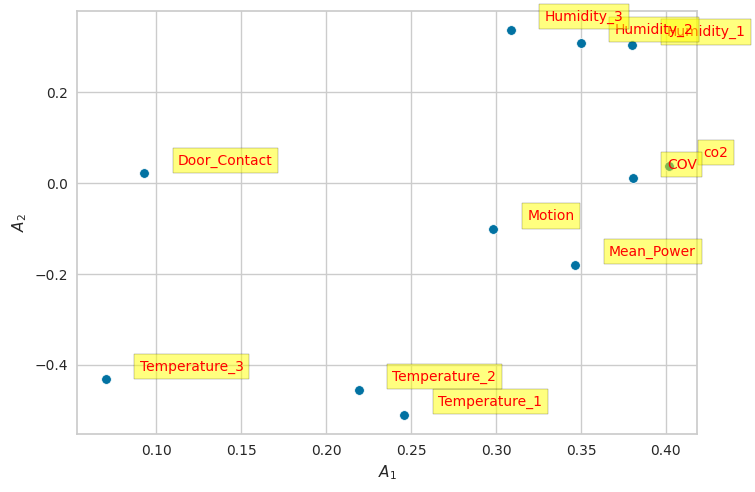

In [144]:
#Scatterplot
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))


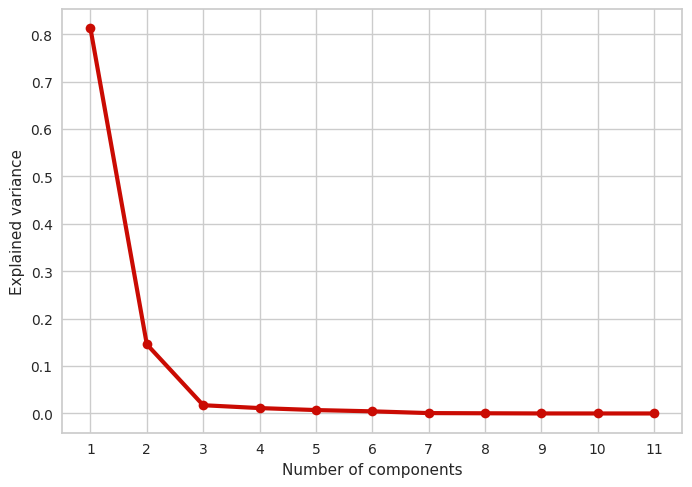

In [173]:
#Screeplot

VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

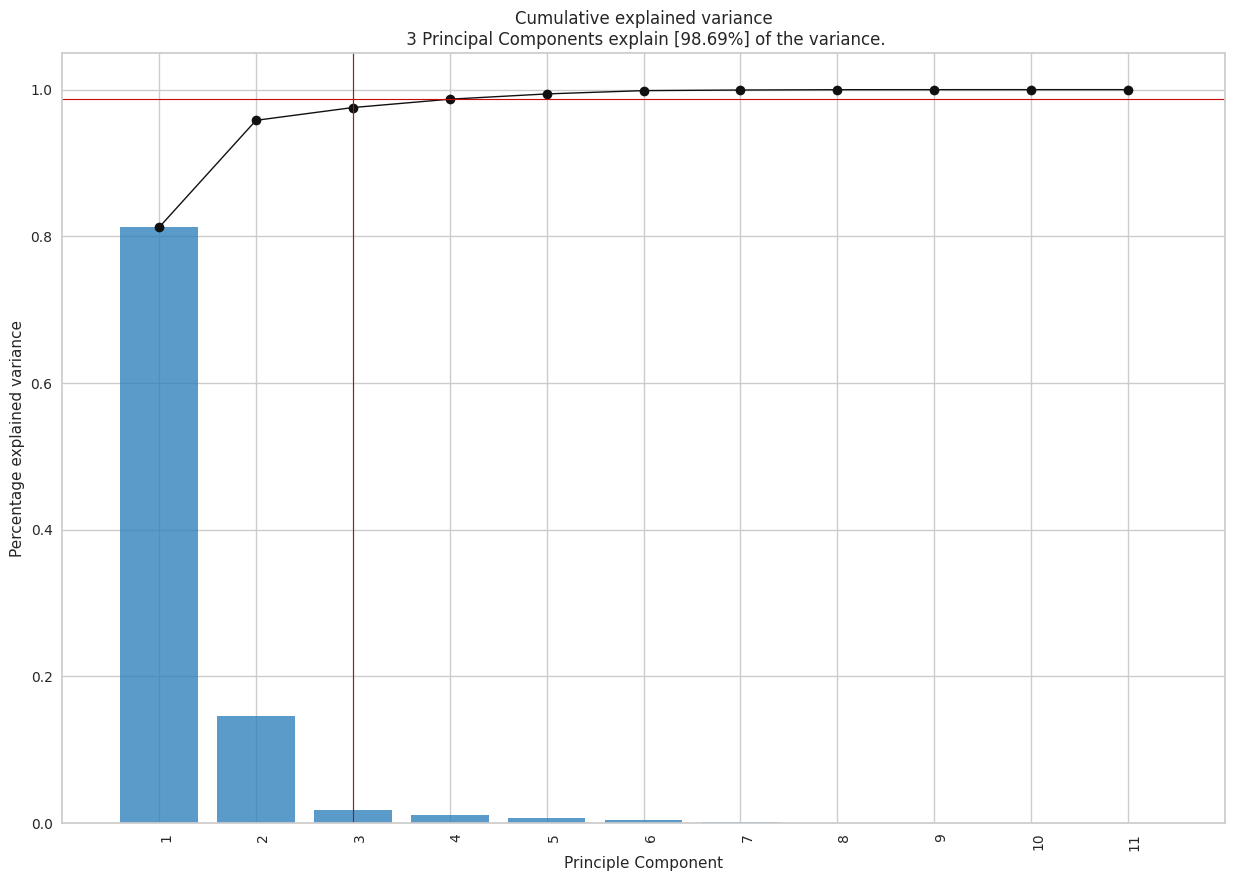

In [174]:
#Explained Variance Plot
model.plot();

In [ ]:
#Biplot
model.biplot(label=False, legend=False, color_arrow='k')

### Pycaret for Model Selection

### Pycaret

In [50]:
import pycaret
from pycaret.classification import *

In [51]:
from pycaret.utils import version
version()

'3.3.2'

In [52]:
#X_train, X_test, y_train, y_test = train_test_split(X,df['Presence'], test_size=0.25, stratify=df['Presence'], random_state = 42)
data_train = df1.sample(frac=0.75, random_state=42)
data_test = df1.drop(data_train.index)

In [53]:
data_train.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

print('Data for Training: ' + str(data_train.shape))
print('Data For Testing: ' + str(data_test.shape))

Data for Training: (801, 12)
Data For Testing: (267, 12)


In [54]:
from pycaret.classification import *
clf = setup(data=df1, target='Presence', train_size=0.75,session_id=123)


In [55]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()
# check the type of exp
type(exp)
# init setup on exp
exp.setup(df1, target = 'Presence', train_size=0.75,session_id = 123)
remove_metric('AUC')
remove_metric('Kappa')
remove_metric('MCC')

In [56]:
# compare baseline models
best = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [57]:
best

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

## Create Random Forest Model

In [58]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [59]:
tuned_rf=tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [60]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [61]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Create Extra Trees Classifier Model

In [62]:
et = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [63]:
tuned_et=tune_model(et)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [64]:
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [65]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Create Gradient Boosting Classifier

In [66]:
gbc = create_model('gbc')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [67]:
tuned_gbc=tune_model(gbc)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [68]:
tuned_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [69]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Find best model using PCA

In [134]:
clf_pca = setup(data=df1, target='Presence',train_size=0.75,normalize = True, session_id=125, pca = True, pca_components = 3)
remove_metric('AUC')
remove_metric('Kappa')
remove_metric('MCC')

In [135]:
best_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

### Classification Models with PCA and SMOTE for imbalanced data

In [74]:
clf_pca = setup(data=df1, target='Presence',train_size=0.75,normalize = True, session_id=125, pca = True, pca_components = 3, fix_imbalance=True)
remove_metric('AUC')
remove_metric('Kappa')
remove_metric('MCC')

In [75]:
X_train_transformed= get_config(variable="X_train_transformed")
y_train_transformed = get_config(variable="y_train_transformed")
X_test_transformed = get_config(variable="X_test_transformed")
y_test_transformed = get_config(variable="y_test_transformed")

Class 0: 579 instances
Class 1: 579 instances
Class 2: 579 instances


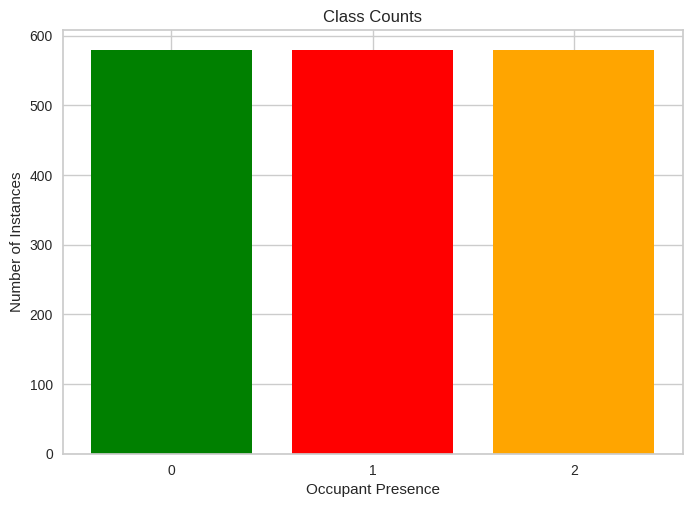

In [76]:
unique_classes, class_counts = np.unique(y_train_transformed, return_counts=True)
colors = ['green', 'red', 'orange']
# Print the results
for class_label, count in zip(unique_classes, class_counts):
    print(f"Class {class_label}: {count} instances")
plt.bar(unique_classes, class_counts, color=colors)
plt.xlabel('Occupant Presence')
plt.ylabel('Number of Instances')
plt.title('Class Counts')
plt.xticks(unique_classes.astype(int))
plt.show()

In [77]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [78]:
compare_tree_models_results = pull()
compare_tree_models_results

Model  Accuracy  Recall   Prec.      F1  \
knn                K Neighbors Classifier    0.9226  0.9226  0.9283  0.9240   
et                 Extra Trees Classifier    0.9126  0.9126  0.9205  0.9147   
rf               Random Forest Classifier    0.9077  0.9077  0.9158  0.9094   
lightgbm  Light Gradient Boosting Machine    0.9064  0.9064  0.9141  0.9081   
xgboost         Extreme Gradient Boosting    0.9027  0.9027  0.9091  0.9042   
dt               Decision Tree Classifier    0.8814  0.8814  0.8911  0.8842   
gbc          Gradient Boosting Classifier    0.8802  0.8802  0.8978  0.8857   
qda       Quadratic Discriminant Analysis    0.8689  0.8689  0.8809  0.8730   
nb                            Naive Bayes    0.8627  0.8627  0.8799  0.8684   
lr                    Logistic Regression    0.8540  0.8540  0.8791  0.8619   
lda          Linear Discriminant Analysis    0.8527  0.8527  0.8742  0.8597   
ada                  Ada Boost Classifier    0.8453  0.8453  0.8765  0.8552   
svm                   SVM - Linear Kernel    0.8240  0.8240  0.8353  0.8216   
ridge                    Ridge Classifier    0.8078  0.8078  0.8342  0.7851   
dummy                    Dummy Classifier    0.7229  0.7229  0.5225  0.6066   

          TT (Sec)  
knn          0.064  
et           0.217  
rf           0.377  
lightgbm     0.755  
xgboost      0.194  
dt           0.056  
gbc          0.992  
qda          0.050  
nb           0.051  
lr           0.065  
lda          0.052  
ada          0.172  
svm          0.085  
ridge        0.082  
dummy        0.050

In [79]:
best_f1_models_top3 = compare_models(sort = 'F1', n_select = 3)

Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [80]:
best_f1_models_top3

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform'),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=125, verbose=0,
                      warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples

In [81]:
#This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list parameter.
blend_models(best_f1_models_top3)

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('K Neighbors Classifier',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=-1, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('Extra Trees Classifier',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=...
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     monotonic_cst=None,
                                                     n_estimators=100,
                                                     n_jobs=-1, oob_score=False,
                                                     random_state=125,
                                                     verbose=0,
                                                     warm_start=False))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

In [82]:
#Tune best Model
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [83]:
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [84]:
tuned_best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

In [85]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [86]:
#creating et Model

In [87]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [88]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [89]:
param_et_pca_smote = tuned_et_pca.get_params()

In [90]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=125, verbose=0,
                     warm_start=False)

In [91]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [92]:
#Creating rf model with PCA
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [93]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [94]:
tuned_rf_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=125, verbose=0,
                       warm_start=False)

In [95]:
evaluate_model(tuned_rf_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [96]:
#Creating lightgbm model with PCA
knn_pca = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [97]:
knn_pca = tune_model(knn_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [98]:
knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

In [99]:
evaluate_model(knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Save Best Model PCA

In [100]:
save_model(tuned_best_model_pca, 'best_pca')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['co2', 'Temperature_1',
                                              'Temperature_2', 'Temperature_3',
                                              'Door_Contact', 'Motion',
                                              'Humidity_1', 'Humidity_2',
                                              'Humidity_3', 'COV',
                                              'Mean_Power'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_...
                  TransformerWrapper(exclud

### Explainable AI using SHAP values

In [101]:
import shap

In [ ]:
interpret_model(tuned_et_pca)

In [103]:
interpret_model(tuned_et_pca, plot='reason', observation=13)

In [104]:
interpret_model(tuned_et_pca, plot='reason')

## Using SHAP only without pycaret

In [105]:
explainer = shap.Explainer(tuned_et_pca)
shap_values_cat=explainer(X_test_transformed)
print(np.shape(shap_values_cat))

(267, 3, 3)


In [106]:
tuned_et_pca.predict_proba(X_test_transformed)[0]

array([0.84, 0.14, 0.02])

Because we are doing multiclass classification, we cannot use SHAP built-in functions directly. We find an alternative by plotting shap plots individual class.

In [ ]:
shap.plots.waterfall(shap_values_cat[0,:,0])

In [ ]:
shap.plots.waterfall(shap_values_cat[0,:,1])

In [ ]:
shap.plots.waterfall(shap_values_cat[0,:,2])

Alternatively, we can try to plot the means of the shapvalues for each class

In [ ]:
mean_0 = np.mean(np.abs(shap_values_cat.values[:,:,0]), axis=0)
mean_1 = np.mean(np.abs(shap_values_cat.values[:,:,1]), axis=0)
mean_2 = np.mean(np.abs(shap_values_cat.values[:,:,2]), axis=0)
dframe= pd.DataFrame({'0': mean_0, '1':mean_1, '2':mean_2})

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
dframe.plot.bar(ax=ax)

ax.set_ylabel("Mean SHAP", size=30)
ax.set_xticklabels(X_test_transformed.columns,rotation=45, size=20)
ax.legend(fontsize=30)

However, the above method can get a bit messy. An alternative way is to aggregate the plots together as follows

In [111]:
preds = tuned_et_pca.predict(X_test_transformed)
new_shap_values=[]
for i, pred in enumerate(preds):
  new_shap_values.append(shap_values_cat.values[i][:,pred])

shap_values_cat.values = np.array(new_shap_values)
print(shap_values_cat.shape)

(267, 3)


In [ ]:
shap.plots.bar(shap_values_cat)

In [ ]:
shap.plots.beeswarm(shap_values_cat)

In [114]:
shap.initjs()
shap.plots.force(shap_values_cat[...,0])

In [115]:
shap.initjs()
shap.plots.force(shap_values_cat[...,1])

In [116]:
shap.initjs()
shap.plots.force(shap_values_cat[...,2])

In [ ]:
shap.plots.heatmap(shap_values_cat[:267])